# Document Search Engine 

In [1]:
import pandas as pd
import numpy as np
import os 
import re
import operator
import nltk 
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer


## Data loading

In [2]:
news = pd.read_json('https://raw.githubusercontent.com/zayedrais/DocumentSearchEngine/master/data/newsgroups.json')


### Document Subject retrieving form data

In [3]:
for i,txt in enumerate(news['content']):
    #print(i)
    subject = re.findall('Subject:(.*\n)',txt)
    if (len(subject) !=0):
        news.loc[i,'Subject'] =str(i)+' '+subject[0]
    else:
        news.loc[i,'Subject'] ='NA'

In [4]:
df_news =news[['Subject','content']]

## Data Cleaning and Pre-processing

In [5]:
# Change all the text to lower case. This is required as python interprets 'dog' and 'DOG' differently
df_news['content']=[entry.lower() for entry in df_news['content']]

/home/zettadevs/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [6]:
SW=['subject:','organization:','thanks','thank','re:']

In [7]:
for sw in SW:
    df_news.content=df_news.content.replace(to_replace=sw,value='',regex=True)

/home/zettadevs/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [8]:
## data Cleaning for content data of news
df_news.content =df_news.content.replace(to_replace='from:(.*\n)',value='',regex=True) #remove from to email 
df_news.content =df_news.content.replace(to_replace='lines:(.*\n)',value='',regex=True)
df_news.content =df_news.content.replace(to_replace='[!"#$%&\'()*+,/:;<=>?@[\\]^_`{|}~]',value=' ',regex=True) #remove punctuation except
df_news.content =df_news.content.replace(to_replace='-',value=' ',regex=True)
df_news.content =df_news.content.replace(to_replace='\s+',value=' ',regex=True)    #remove new line
df_news.content =df_news.content.replace(to_replace='  ',value='',regex=True)                #remove double white space
df_news.content =df_news.content.apply(lambda x:x.strip())  # Ltrim and Rtrim of whitespace

In [9]:
## data cleaning for subject data 
df_news.Subject =df_news.Subject.replace(to_replace='Re:',value='',regex=True)
df_news.Subject =df_news.Subject.replace(to_replace='[!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]',value=' ',regex=True)
df_news.Subject =df_news.Subject.replace(to_replace='\s+',value=' ',regex=True)    #remove new line
df_news.Subject =df_news.Subject.replace(to_replace='  ',value='',regex=True)    #remove double white space
df_news.Subject =df_news.Subject.apply(lambda x:x.strip())

### Checking  and dropempty data rows

In [10]:
## ## Checking  and drop empty data
for i,sen in enumerate(df_news.content):
    if len(sen.strip()) ==0:
        print(str(i))
        #file_data.text[i] = np.nan
        df_news=df_news.drop(str(i),axis=0).reset_index().drop('index',axis=1)

### Word Tokenization

In [11]:
# okenization : In this each entry in the file_data will be broken into set of words
df_news['Word tokenize']= [word_tokenize(entry) for entry in df_news.content]

/home/zettadevs/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### Word Lemmatization

In [12]:
# WordNetLemmatizer requires Pos tags to understand if the word is noun or verb or adjective etc. By default it is set to Noun
def wordLemmatizer(data):
    tag_map = defaultdict(lambda : wn.NOUN)
    tag_map['J'] = wn.ADJ
    tag_map['V'] = wn.VERB
    tag_map['R'] = wn.ADV
    file_clean_k =pd.DataFrame()
    for index,entry in enumerate(data):
        
        # Declaring Empty List to store the words that follow the rules for this step
        Final_words = []
        # Initializing WordNetLemmatizer()
        word_Lemmatized = WordNetLemmatizer()
        # pos_tag function below will provide the 'tag' i.e if the word is Noun(N) or Verb(V) or something else.
        for word, tag in pos_tag(entry):
            # Below condition is to check for Stop words and consider only alphabets
            if len(word)>1 and word not in stopwords.words('english') and word.isalpha():
                word_Final = word_Lemmatized.lemmatize(word,tag_map[tag[0]])
                Final_words.append(word_Final)
            # The final processed set of words for each iteration will be stored in 'text_final'
                file_clean_k.loc[index,'Keyword_final'] = str(Final_words)
                file_clean_k.loc[index,'Keyword_final'] = str(Final_words)
                file_clean_k=file_clean_k.replace(to_replace ="\[.", value = '', regex = True)
                file_clean_k=file_clean_k.replace(to_replace ="'", value = '', regex = True)
                file_clean_k=file_clean_k.replace(to_replace =" ", value = '', regex = True)
                file_clean_k=file_clean_k.replace(to_replace ='\]', value = '', regex = True)
    return file_clean_k

In [13]:
df_news.shape 

(11314, 3)

In [130]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [139]:
## This Function took around 13 hours for word Lemmatized and remove the Stop words & single character of word of each 11314 rows.
df_clean = wordLemmatizer(df_news['Word tokenize'][0:10]) 
df_clean

,Keyword_final
0,"car,nntp,post,host,university,maryland,college..."
1,"si,clock,poll,final,call,summary,final,call,si..."
2,"pb,question,purdue,university,engineering,comp..."
3,"weitek,harris,computer,system,division,distrib..."
4,"shuttle,launch,question,smithsonian,astrophysi..."
5,"reword,second,amendment,idea,vtt,article,cdt,t..."
6,"brain,tumor,treatment,reply,bmdelane,universit..."
7,"ide,vs,scsi,new,mexico,state,university,la,cru..."
8,"win,icon,help,please,university,northern,iowa,..."
9,"sigma,design,double,article,university,illinoi..."


### Added WordLemmatize words into given dataframe

In [19]:
## Insert New column in df_news to stored the Clean Keyword
df_news.insert(loc=3, column='Clean_Keyword', value=df_clean['Keyword_final'].tolist())

In [15]:
## Already Word lemmatize clean keywords the below path:-

#df_news[['Subject','Clean_Keyword']].to_json("WordLemmatize20NewsGroup.json")
df =pd.read_json('https://raw.githubusercontent.com/zayedrais/DocumentSearchEngine/master/data/WordLemmatize20NewsGroup.json')
df_news['Clean_Keyword'] =df['Clean_Keyword']

In [16]:
## Sample of clean keywords
df_news.Clean_Keyword[0]

'thing,car,nntp,post,host,university,maryland,college,park,line,wonder,anyone,could,enlighten,car,saw,day,sport,car,look,late,early,call,bricklin,door,really,small,addition,front,bumper,separate,rest,body,know,anyone,tellme,model,name,engine,spec,year,production,car,make,history,whatever,info,funky,look,car,please,mail,il,bring,neighborhood,lerxst'

# 1. Create document search engine with TF-IDF

### TF-IDF by using  TfidfVectorizer from sklearn.feature_extraction.text

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
import operator

## Create Vocabulary
vocabulary = set()

for doc in df_news.Clean_Keyword:
    vocabulary.update(doc.split(','))

vocabulary = list(vocabulary)

# Intializating the tfIdf model
tfidf = TfidfVectorizer(vocabulary=vocabulary)

# Fit the TfIdf model
tfidf.fit(df_news.Clean_Keyword)

# Transform the TfIdf model
tfidf_tran=tfidf.transform(df_news.Clean_Keyword)


In [18]:
vocabulary[0:4]

['shoham', 'bures', 'schwabians', 'dangle']

### Create vector for Query/search keywords

In [19]:
## Create vector for Query/search keywords
def gen_vector_T(tokens):

    Q = np.zeros((len(vocabulary)))
    
    x= tfidf.transform(tokens)
    #print(tokens[0].split(','))
    for token in tokens[0].split(','):
        #print(token)
        try:
            ind = vocabulary.index(token)
            #print(ind)
            #Q[ind] = tf*idf
            Q[ind]  = x[0, tfidf.vocabulary_[token]]
        except:
            pass
    return Q

In [20]:
tfidf_tran.A.shape

(11314, 62840)

### Calculate Cosine Similarity with formula 

In [21]:
def cosine_sim(a, b):
    cos_sim = np.dot(a, b)/(np.linalg.norm(a)*np.linalg.norm(b))
    return cos_sim

### Calculate Cosine similarity of trained Tfidf to input query

In [22]:
def cosine_similarity_T(k, query):
    #print("Cosine Similarity")
    preprocessed_query = preprocessed_query = re.sub("\W+", " ", query).strip()
    tokens = word_tokenize(str(preprocessed_query))
    q_df = pd.DataFrame(columns=['q_clean'])
    q_df.loc[0,'q_clean'] =tokens
    q_df['q_clean'] =wordLemmatizer(q_df.q_clean)
    #print("\nQuery:", query)
    #print("")
    #print(tokens)
    
    d_cosines = []
    
    query_vector = gen_vector_T(q_df['q_clean'])
    
    for d in tfidf_tran.A:
        
        d_cosines.append(cosine_sim(query_vector, d))
                    
    out = np.array(d_cosines).argsort()[-k:][::-1]
    #print("")
    d_cosines.sort()
    #print(out)
    a = pd.DataFrame()
    for i,index in enumerate(out):
        a.loc[i,'index'] = str(index)
        a.loc[i,'Subject'] = df_news['Subject'][index]
    for j,simScore in enumerate(d_cosines[-k:][::-1]):
        a.loc[j,'Score'] = simScore
    return a

In [23]:
%time cosine_similarity_T(10,'computer science')
#df_news['Subject']

CPU times: user 2.57 s, sys: 1.47 s, total: 4.04 s
Wall time: 2.83 s


,index,Subject,Score
0,2231,2231 Computer Engr vs Computer Science,0.396137
1,10340,10340 Science and Methodology,0.302603
2,4173,4173 Rawlins debunks creationism,0.284936
3,4326,4326 Computer Engr vs Computer Science,0.284256
4,6921,6921 Automatic layout of state diagrams,0.260732
5,7618,7618 Solution Why do I need xrdb m when Xdefau...,0.251170
6,5741,5741 Rawlins debunks creationism,0.247442
7,8464,8464 Date is stuck,0.238985
8,3177,3177 Homeopathy a respectable medical tradition,0.235738
9,4366,4366 Computer Engr vs Computer Science,0.227186


In [24]:
df_news.content[2231]

'computer engr vs. computer science distribution usa ncr microelectronics products division an at t company in article 1993apr10.210242.340 macadam.com mike macadam.com writes i am a freshman in college and can t decide whether to major in computer engineering or computer science. any advice or suggestions will be appreciated. mike a professor of mine once said the difference between a computer engineer and a computer scientist is about 5000 meaning the engineer makes 5000 more than the cs. seriously though the main difference is that most cs people write programs that people will use i.e. database graphics word processors etc. while an engineer writes for machines or control systems i.e. the computer in your car a flight control system computer controled devices etc. in other words cs writes software while cse writes firmware. these are generalizations but for the most part that is what the difference is. p.s. the 5000 is not just a joke scott'

# 2. Document Search Engine with Google Universal Sentence Encoder

In [207]:
!pip install --upgrade tensorflow-gpu
#Install TF-Hub.
!pip install tensorflow-hub
!pip install seaborn

Requirement already up-to-date: tensorflow-gpu in ./anaconda3/lib/python3.7/site-packages (2.1.0)


In [34]:
import pandas as pd
import numpy as np
import re, string
import os 
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import linear_kernel

In [35]:
print("Version: ", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("Hub version: ", hub.__version__)
print("GPU is", "available" if tf.config.experimental.list_physical_devices("GPU") else "NOT AVAILABLE")

Version:  2.1.0
Eager mode:  True
Hub version:  0.7.0
GPU is NOT AVAILABLE


### Load Google Universal sentence Encoder(DAN) Pretrained model

In [36]:
#!mkdir /home/zettadevs/GoogleUSE Model
#! curl -L -o 4.tar.gz "https://tfhub.dev/google/universal-sentence-encoder/4?tf-hub-format=compressed" 
#module_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
module_path ="/home/zettadevs/GoogleUSEModel/USE_4"
%time model = hub.load(module_path)
#print ("module %s loaded" % module_url)

#Create function for using modeltraining
def embed(input):
    return model(input)

CPU times: user 4.36 s, sys: 1.19 s, total: 5.55 s
Wall time: 13.2 s


### Use Case of Google USE

In [37]:
def plot_similarity(labels, features, rotation):
    corr = np.inner(features, features)
    sns.set(font_scale=1.2)
    g = sns.heatmap(
      corr,
      xticklabels=labels,
      yticklabels=labels,
      vmin=0,
      vmax=1,
      cmap="YlOrRd")
    g.set_xticklabels(labels, rotation=rotation)
    g.set_title("Semantic Similarity")

In [38]:
def run_and_plot_U(messages_):
    message_embeddings_ = embed(messages_)
    plot_similarity(messages_, message_embeddings_, 90)

In [39]:
def SimilarityScore(messages):
    message_embedding = embed(messages)
    corr = np.inner(message_embedding,message_embedding)
    #for i, message_embedding in enumerate(np.array(message_embeddings).tolist()):
    #    print("Message: {}".format(messages[i]))
    print(corr)

### Use Case 1:- Word semantic

In [40]:
WordMessage =['big data', 'millions of data', 'millions of records','cloud computing','aws','azure','saas','bank','account']

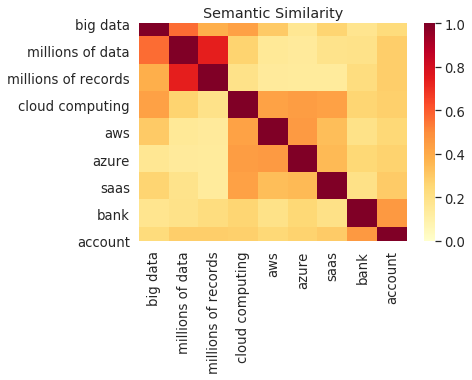

In [41]:
run_and_plot_U(WordMessage)  # here 'big data' and 'millions od data' it's correlated score is between 0.6 to 0.5.
                            # Even 'AWS' and 'Azure' are also b/w 0.6 to 0.5. As you can see below pic

### Use Case 2: Sentence Semantic

In [42]:
SentMessage =['How old are you?','what is your age?','how are you?','how you doing?']

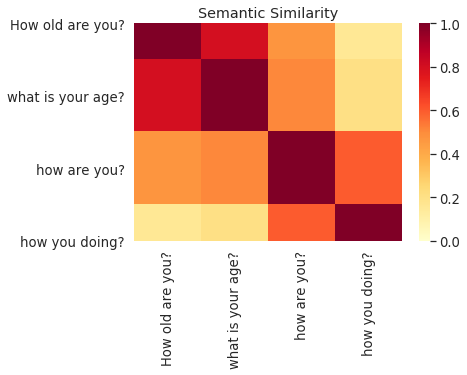

In [43]:
run_and_plot_U(SentMessage)

### Use Case 3: Word,Sentence and paragram Semantic

In [44]:
word ='Cloud computing'
Sentence = 'what is cloud computing'
Para =("Cloud computing is the latest generation technology with a high IT infrastructure that provides us a means by which we can use and utilize the applications as utilities via the internet."
        "Cloud computing makes IT infrastructure along with their services available 'on-need' basis." 
        "The cloud technology includes - a development platform, hard disk, computing power, software application, and database.")
Para5 =(
    "Universal Sentence Encoder embeddings also support short paragraphs. "
    "There is no hard limit on how long the paragraph is. Roughly, the longer "
    "the more 'diluted' the embedding will be.")
Para6 =("Azure is a cloud computing platform which was launched by Microsoft in February 2010."
       "It is an open and flexible cloud platform which helps in development, data storage, service hosting, and service management."
       "The Azure tool hosts web applications over the internet with the help of Microsoft data centers.")
case4Message=[word,Sentence,Para,Para5,Para6]


In [45]:
SimilarityScore(case4Message)


[[ 1.          0.78288543  0.5078862   0.01781903  0.50382084]
 [ 0.78288543  1.0000002   0.5534511  -0.03384617  0.5246216 ]
 [ 0.5078862   0.5534511   1.0000001   0.05925356  0.58710706]
 [ 0.01781903 -0.03384617  0.05925356  0.9999999   0.01667345]
 [ 0.50382084  0.5246216   0.58710706  0.01667345  1.        ]]


In [163]:
len(df_news.content)

11314

## Training the google use model batch wise chunk size 1000 rows

In [151]:
ls =[]
chunksize =1000
le =len(df_news.content)
for i in range(0,le,chunksize):
    if(i+chunksize > le): 
        chunksize= le;
        ls.append(chunksize)
    else:
        a =i+chunksize
        ls.append(a)
ls
j=0
for i in ls:
    directory = "/home/zettadevs/GoogleUSEModel/TrainModel/" + str(i)
    if not os.path.exists(directory):
        os.makedirs(directory)
    directory = "/home/zettadevs/GoogleUSEModel/TrainModel/" + str(i)
    print(j,i) 
    m=embed(df_news.content[j:i])
    exported_m = tf.train.Checkpoint(v=tf.Variable(m))
    exported_m.f = tf.function(
    lambda  x: exported_m.v * x,
    input_signature=[tf.TensorSpec(shape=None, dtype=tf.float32)])

    tf.saved_model.save(exported_m,directory)
    j = i
    print(i)

0 1000
INFO:tensorflow:Assets written to: /home/zettadevs/GoogleUSEModel/TrainModel/1000/assets
1000
1000 2000
INFO:tensorflow:Assets written to: /home/zettadevs/GoogleUSEModel/TrainModel/2000/assets
2000
2000 3000
INFO:tensorflow:Assets written to: /home/zettadevs/GoogleUSEModel/TrainModel/3000/assets
3000
3000 4000
INFO:tensorflow:Assets written to: /home/zettadevs/GoogleUSEModel/TrainModel/4000/assets
4000
4000 5000
INFO:tensorflow:Assets written to: /home/zettadevs/GoogleUSEModel/TrainModel/5000/assets
5000
5000 6000
INFO:tensorflow:Assets written to: /home/zettadevs/GoogleUSEModel/TrainModel/6000/assets
6000
6000 7000
INFO:tensorflow:Assets written to: /home/zettadevs/GoogleUSEModel/TrainModel/7000/assets
7000
7000 8000
INFO:tensorflow:Assets written to: /home/zettadevs/GoogleUSEModel/TrainModel/8000/assets
8000
8000 9000
INFO:tensorflow:Assets written to: /home/zettadevs/GoogleUSEModel/TrainModel/9000/assets
9000
9000 10000
INFO:tensorflow:Assets written to: /home/zettadevs/Googl

##  Batch wise Load the model

In [219]:
ar =[]
for i in ls:
    directory = "/home/zettadevs/GoogleUSEModel/TrainModel/" + str(i)
    if os.path.exists(directory):
        print(directory)
        imported_m = tf.saved_model.load(directory)
        a= imported_m.v.numpy()
        #print(a)
        exec(f'load{i} = a')     

/home/zettadevs/GoogleUSEModel/TrainModel/1000
/home/zettadevs/GoogleUSEModel/TrainModel/2000
/home/zettadevs/GoogleUSEModel/TrainModel/3000
/home/zettadevs/GoogleUSEModel/TrainModel/4000
/home/zettadevs/GoogleUSEModel/TrainModel/5000
/home/zettadevs/GoogleUSEModel/TrainModel/6000
/home/zettadevs/GoogleUSEModel/TrainModel/7000
/home/zettadevs/GoogleUSEModel/TrainModel/8000
/home/zettadevs/GoogleUSEModel/TrainModel/9000
/home/zettadevs/GoogleUSEModel/TrainModel/10000
/home/zettadevs/GoogleUSEModel/TrainModel/11000
/home/zettadevs/GoogleUSEModel/TrainModel/11314


## Concatenate the array from batchwise loaded model

In [222]:
con_a =np.concatenate((load1000, load2000,load3000,load4000,load5000,load6000,load7000,load8000,load9000,load10000,load11000,load11314))
con_a.shape

(11314, 512)

## Training the model for single time

In [126]:
## training the model
Model_USE= embed(df_news.content[0:2500])

## Save model for single time

In [127]:
exported = tf.train.Checkpoint(v=tf.Variable(Model_USE))
exported.f = tf.function(
    lambda  x: exported.v * x,
    input_signature=[tf.TensorSpec(shape=None, dtype=tf.float32)])

tf.saved_model.save(exported,'/home/zettadevs/GoogleUSEModel/TrainModel')

INFO:tensorflow:Assets written to: /home/zettadevs/GoogleUSEModel/TrainModel/assets


## Load model for single time

In [224]:
## Load Model
imported = tf.saved_model.load('/home/zettadevs/GoogleUSEModel/TrainModel/')
loadedmodel =imported.v.numpy()
loadedmodel.shape

(2500, 512)

## Create Function to get the top Similare document by giving input as a keyword or sentence.

In [225]:
def SearchDocument(query):
    q =[query]
    # embed the query for calcluating the similarity
    Q_Train =embed(q)
    
    #imported_m = tf.saved_model.load('/home/zettadevs/GoogleUSEModel/TrainModel')
    #loadedmodel =imported_m.v.numpy()
    # Calculate the Similarity
    linear_similarities = linear_kernel(Q_Train, con_a).flatten() 
    #Sort top 10 index with similarity score
    Top_index_doc = linear_similarities.argsort()[:-11:-1]
    # sort by similarity score
    linear_similarities.sort()
    a = pd.DataFrame()
    for i,index in enumerate(Top_index_doc):
        a.loc[i,'index'] = str(index)
        a.loc[i,'File_Name'] = df_news['Subject'][index] ## Read File name with index from File_data DF
    for j,simScore in enumerate(linear_similarities[:-11:-1]):
        a.loc[j,'Score'] = simScore
    return a


In [226]:
SearchDocument('computer science')

,index,File_Name,Score
0,2231,2231 Computer Engr vs Computer Science,0.465967
1,4326,4326 Computer Engr vs Computer Science,0.446216
2,4527,4527 Honors Degrees Do they mean anything,0.427539
3,8920,8920 Honors Degrees Do they mean anything,0.415799
4,4366,4366 Computer Engr vs Computer Science,0.385471
5,8464,8464 Date is stuck,0.316040
6,1056,1056 New Computer Books for Sale,0.314108
7,5618,5618 Technical Books for sale X UNIX C C OS DB...,0.311888
8,8148,8148 Rendering Software for Multi processor Co...,0.302753
9,10460,10460 X window for PC,0.295158
